In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
sns.set(rc={'figure.figsize':(9,6)}, context ='paper',font_scale=1.3)


# Load Database - NBA Stats from 1990-2018

In [3]:
#Load NBA data going back to 1990-91 Season

df = pd.read_csv('historical_data2.csv')

In [3]:
#Data Sample
df.head()

,player,debut,salary,season_start,season_end,years_pro,tm,year_cap,percent_of_cap,age,...,tov_perv,usg_perc,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
0,A.C. Green,1985,1750000,1990,1991,6,LAL,11871000,0.147418,27,...,12.8,15.6,3.2,2.9,6.1,0.135,0.0,0.6,0.5,0.1
1,A.C. Green,1985,1750000,1991,1992,7,LAL,12500000,0.140000,28,...,10.0,16.8,5.8,2.9,8.8,0.145,1.2,0.2,1.4,0.4
2,A.C. Green,1985,1750000,1992,1993,8,LAL,14000000,0.125000,29,...,11.8,15.0,6.1,2.6,8.6,0.147,1.6,0.5,2.1,1.1
3,A.C. Green,1985,1885000,1993,1994,9,PHO,15175000,0.124217,30,...,8.4,17.6,6.7,2.6,9.3,0.157,1.5,-0.3,1.2,0.6
4,A.C. Green,1985,6472600,1994,1995,10,PHO,15964000,0.405450,31,...,12.9,14.2,4.6,2.1,6.7,0.120,0.6,0.2,0.7,-1.3


# Data Visualization

([], <a list of 0 Text yticklabel objects>)

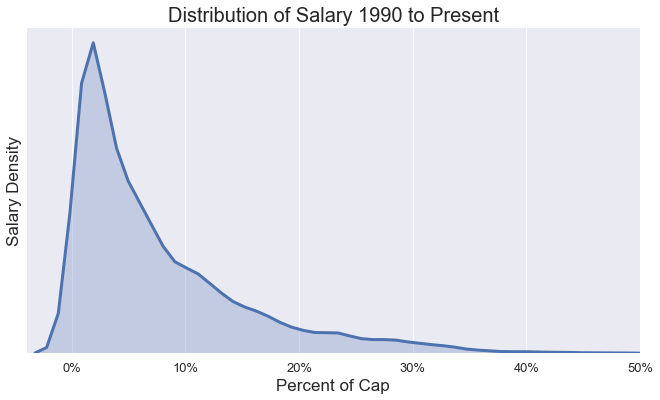

In [204]:
#Distribution of Salary
plt.figure(figsize=(11,6))
salray_dist = sns.kdeplot(df['percent_of_cap'], shade = True, lw = 3)
salray_dist.set_title('Distribution of Salary 1990 to Present', fontsize = 20)
plt.legend('', frameon = False)
plt.xlabel('Percent of Cap', fontsize = 17)
plt.ylabel('Salary Density', fontsize = 17)
plt.xlim(-.04,0.5)
tic_vals = salray_dist.get_xticks()
salray_dist.set_xticklabels(['{:,.0%}'.format(x) for x in tic_vals], fontsize = 13)
#salray_dist.axes.get_yaxis().set_visible(False)
#plt.tick_params(axis = 'y', which = 'both', bottom = False, top = False, labelbottom = False)
plt.yticks([],[])

In [8]:
#Correlation plot function
def salary_corr_plot(stat1, stat2):
    x = stat1
    y = stat2
    plt.figure(figsize=(11,6))
    sal_corr_plot = sns.scatterplot(x, y, alpha = 0.5, s =90)
    sal_corr_plot.set_title('%s vs %s' %(stat1.name.upper(), stat2.name.upper()))
    sal_corr_plot.set(ylabel=stat2.name.upper(), xlabel= stat1.name.upper())
    
    plt.xticks(fontsize = 13)
    tic_vals = sal_corr_plot.get_yticks()
    sal_corr_plot.set_yticklabels(['{:,.0%}'.format(x) for x in tic_vals], fontsize = 13)
    plt.yticks(fontsize = 13)
    sal_corr_plot.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red', lw = 4)

Text(0.5, 1.0, 'Points/Game vs Percentage of Cap')

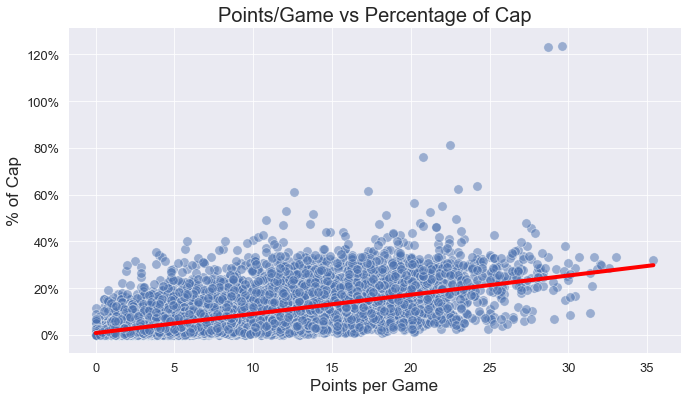

In [9]:
salary_corr_plot(df['pts'], df['percent_of_cap'])
plt.ylabel('% of Cap', fontsize=17 )
plt.xlabel('Points per Game', fontsize=17 )
plt.title('Points/Game vs Percentage of Cap', fontsize = 20)

Text(0.5, 1.0, 'Win Shares vs Percentage of Cap')

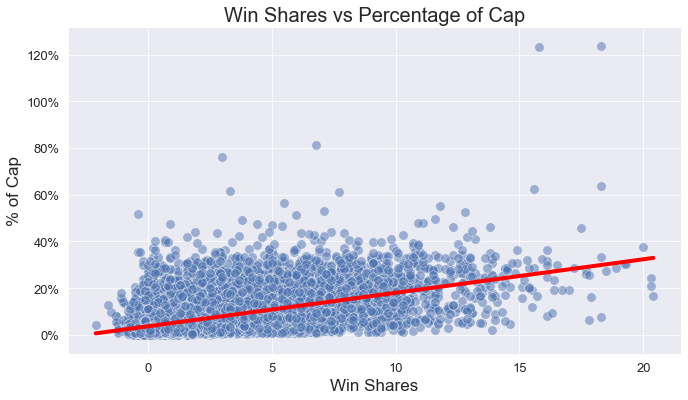

In [10]:
salary_corr_plot(df['ws'], df['percent_of_cap'])
plt.ylabel('% of Cap', fontsize=17 )
plt.xlabel('Win Shares', fontsize=17 )
plt.title('Win Shares vs Percentage of Cap', fontsize = 20)

(-2, 45)

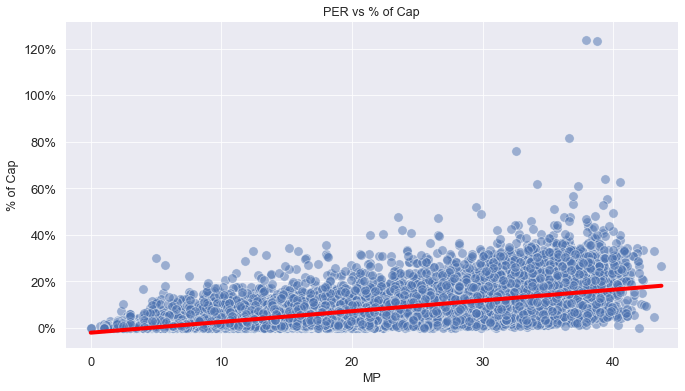

In [14]:
salary_corr_plot(df['mp'], df['percent_of_cap'])
plt.ylabel('% of Cap')
plt.title('PER vs % of Cap')
plt.xlim(-2, 45)

Text(0.5, 1.0, 'Years Pro vs % of Cap')

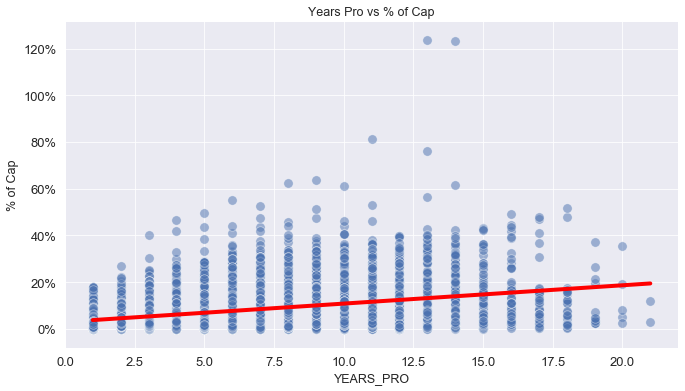

In [15]:
salary_corr_plot(df['years_pro'], df['percent_of_cap'])
plt.ylabel('% of Cap')
plt.title('Years Pro vs % of Cap')

([<matplotlib.axis.XTick at 0x1a2214b150>,
 <a list of 12 Text xticklabel objects>)

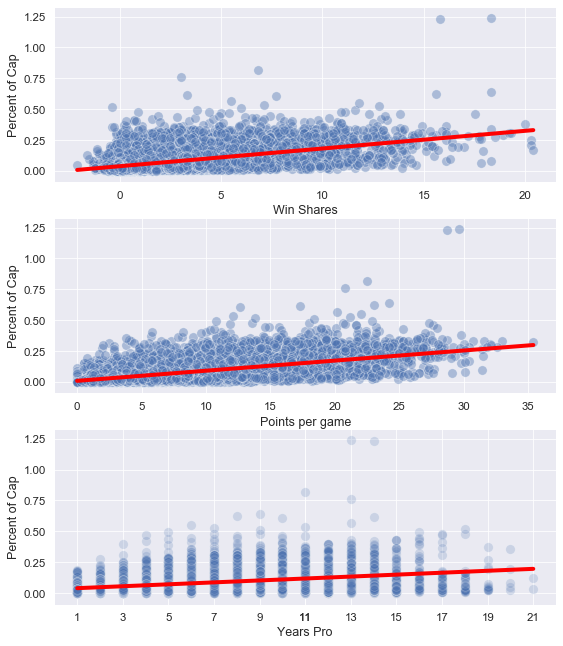

In [16]:
f, axes = plt.subplots(3, figsize = (9,11))

x= df['ws']
stat1 = df['ws']
y= df['percent_of_cap']
stat2 = df['percent_of_cap']
axes[0] = sns.scatterplot(x, y, alpha = 0.4, s =90 , ax=axes[0])
axes[0].set(xlabel = 'Win Shares', ylabel = 'Percent of Cap')   
axes[0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red', lw = 4)

x2= df['pts']
stat1 = df['pts']
y2= df['percent_of_cap']
stat2 = df['percent_of_cap']
axes[1] = sns.scatterplot(x2, y2, alpha = 0.4, s =90 , ax=axes[1])
axes[1].set(xlabel = 'Points per game', ylabel = 'Percent of Cap')   
axes[1].plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)), color = 'red', lw = 4)

x= df['years_pro']
stat1 = df['years_pro']
y= df['percent_of_cap']
stat2 = df['percent_of_cap']
axes[2] = sns.scatterplot(x, y, alpha = 0.2, s =90 , ax=axes[2])
axes[2].set(xlabel = 'Years Pro', ylabel = 'Percent of Cap')   
axes[2].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red', lw = 4)
x_tics = [1,3, 5,7,9,11,13,15,11,17,19,21]
plt.xticks(x_tics)

# Feature Selection

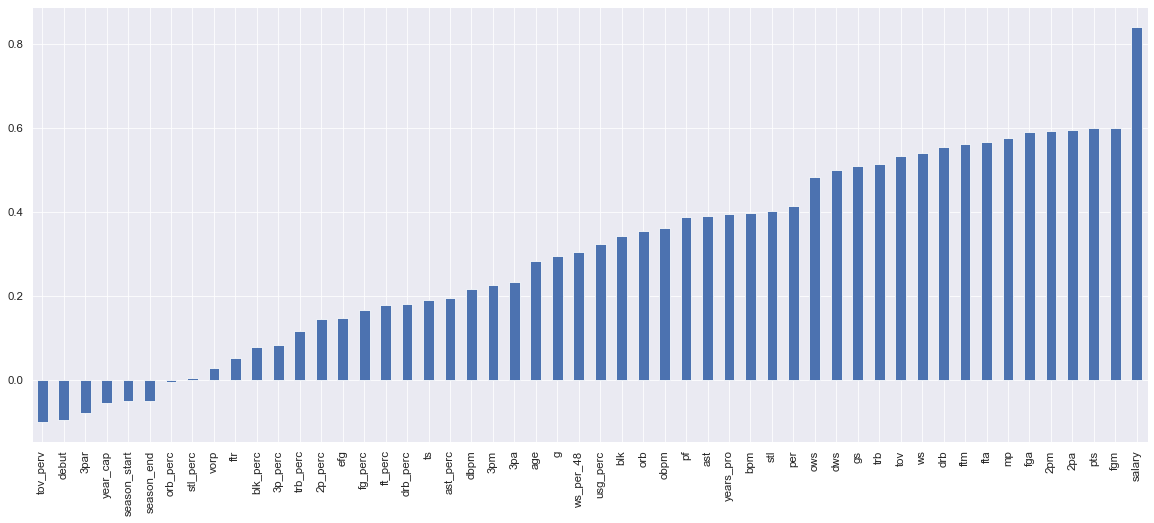

In [11]:
#Correlation Visualization
total_corr = df.corr()['percent_of_cap'].sort_values().drop('percent_of_cap')
plt.figure(figsize=(20,8))
total_corr.plot(kind = 'bar')

In [7]:
#Selected Features 

features =  ['percent_of_cap','years_pro','pts', 'trb', 'ast', 'stl','blk', 'ws', 'ts', 'mp', 'bpm']



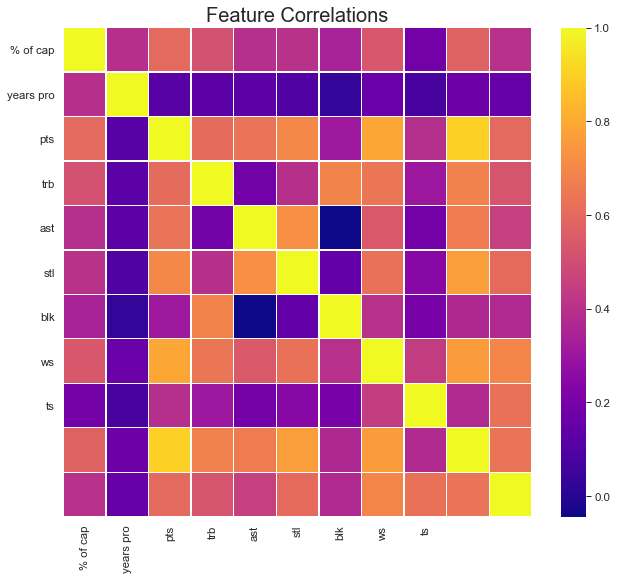

In [13]:
# Correlation plot of features

corr = df[features].corr()

plt.figure(figsize=(10.5,9))
axis_labels = ['% of cap','years pro','pts', 'trb', 'ast', 'stl','blk', 'ws', 'ts'] # labels for x-axis


sns.heatmap(corr, cmap= 'plasma', linewidths= 0.3, xticklabels=axis_labels, yticklabels=axis_labels)
plt.title('Feature Correlations', fontsize = 20)
sns.set(font_scale= 2)


In [14]:
df[features].corr()['percent_of_cap'].sort_values().drop('percent_of_cap')

ts           0.189719
blk          0.342560
ast          0.389724
years_pro    0.394386
bpm          0.398118
stl          0.401606
trb          0.514281
ws           0.539142
mp           0.574955
pts          0.600306
Name: percent_of_cap, dtype: float64

In [8]:
#Split Data

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df[features].drop('percent_of_cap', axis = 1)
y = df['percent_of_cap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print('Train Data = ', len(X_train),'Test Data = ', len(X_test))

Train Data =  8115 Test Data =  2705


In [9]:
# Model Scoring function

def scores(model):
    #model.fit(X_train, y_train)
    pred  = model.predict(X_test)
    
    print('MSE: %.3f' %mean_squared_error(y_test, pred))
    print('R2 score: %.3f' %r2_score(y_test, pred))
    print('MAE score: %.3f' %mean_absolute_error(y_test, pred))
    
    
    cv_score = cross_val_score(model, X_test, y_test.values.ravel(), cv = 3, scoring= 'neg_mean_squared_error')
    print('MSE cross validation score: %0.3f (+/- %0.3f)' %(cv_score.mean(), cv_score.std()*2))
    
    cv_score = cross_val_score(model, X_test, y_test.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.3f (+/- %0.3f)" % (cv_score.mean(), cv_score.std() * 2))
    
    return pred

In [16]:
# Grid search for parameter optimization

from sklearn.model_selection import KFold, GridSearchCV

cv = KFold(n_splits = 3)

def grid_search(model, grid):
    gs = GridSearchCV(model, grid, cv = cv, n_jobs = -1, verbose = 0, scoring = 'neg_mean_squared_error')
    gs_result = gs.fit(X_train, y_train)
    print(gs_result.best_params_)
    return gs_result

In [18]:
# Plot of residuals

def residuals(y_pred):
    
    resid = [i for i in (y_test.values.reshape(y_test.shape[0],) - y_pred)]
    ssr = [i ** 2 for i in resid]
    
    ssr_sum = sum(ssr)
        
    stand_resid = []
    for i in resid:
        stand_resid.append(i / ((ssr_sum / (y_test.shape[0] - 2)) ** (1/2)))
        
    return stand_resid

In [19]:
# function to find outliers in standardized residuals (points more than 2 stdev away from mean)

def outliers(x):
    
    np_list = np.array(x)
    stdev = np.std(np_list)
    mean = np.mean(np_list)

    outliers = 0
    for i in x:
        if i < mean - 2 * stdev:
            outliers += 1
        elif i > mean + 2 * stdev:
            outliers += 1

    outlier_percent = 1 - outliers / y_test.shape[0]
    outlier_string = "{:.2%}".format(outlier_percent)
    
    return outlier_string

## K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsRegressor
start_time = time.time()
knn = KNeighborsRegressor()

n_neighbors = [x for x in np.arange(10, 30)]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan']

grid = {'n_neighbors': n_neighbors,
        'weights': weights, 'metric' : metric}

knn = grid_search(knn, grid)

knn_prediction = scores(knn)
print(time.time()-start_time)

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
MSE: 0.003
R2 score: 0.565
MAE score: 0.036
MSE cross validation score: -0.003 (+/- 0.000)
R2 cross validation score: 0.542 (+/- 0.048)
25.875183820724487


In [21]:
# K=Nearest Neighbors Prediction

knn_prediction = scores(knn)

MSE: 0.003
R2 score: 0.565
MAE score: 0.036
MSE cross validation score: -0.003 (+/- 0.000)
R2 cross validation score: 0.542 (+/- 0.048)


Text(0.5, 1.0, 'Residuals: K-Nearest Neighbors')

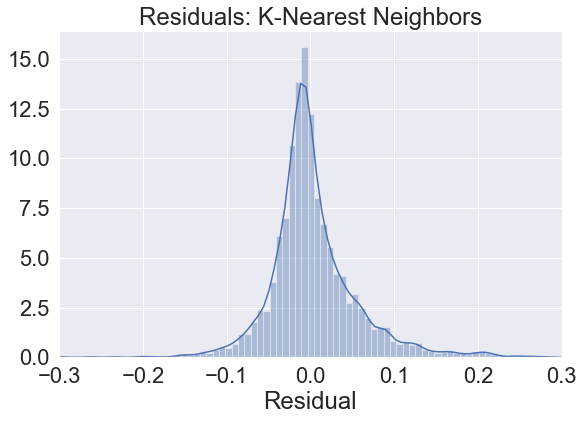

In [22]:
# Plot of residuals

sns.distplot((y_test - knn_prediction), bins=100, norm_hist = False);
plt.xlabel('Residual')
plt.xlim(-0.3, 0.3)
plt.title('Residuals: K-Nearest Neighbors')

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

grid = {'fit_intercept': [True, False],
        'normalize': [True, False]}

lm = grid_search(lm, grid)

{'fit_intercept': True, 'normalize': True}


In [24]:
#Linear Model Prediction

lm_prediction = scores(lm)

MSE: 0.003
R2 score: 0.525
MAE score: 0.040
MSE cross validation score: -0.003 (+/- 0.000)
R2 cross validation score: 0.517 (+/- 0.037)


Text(0.5, 1.0, 'Residuals: Linear Regression')

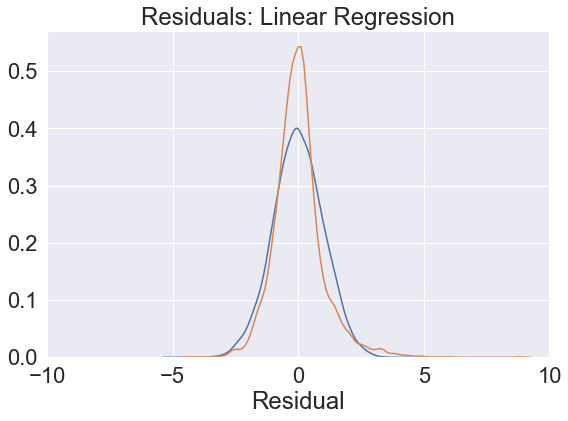

In [25]:
norm = np.random.standard_normal(10000)
#sns.distplot((residuals(lm_prediction)),bins=100, norm_hist = False)
#sns.distplot((residuals()),bins=100, norm_hist = False)
sns.kdeplot(norm)
sns.kdeplot(residuals(lm_prediction))
plt.xlabel('Residual')
plt.xlim(-10, 10)
plt.title('Residuals: Linear Regression')

## Support Vector Regression

In [26]:
from sklearn.svm import SVR

svr = SVR()

grid = { 'C': [2000,22000,2400,26000,28000,30000] ,
        'gamma': [1e-5,1e-6, 1e-7], 'epsilon': [.1,.01,.001] }

svr = grid_search(svr, grid)

{'C': 26000, 'epsilon': 0.001, 'gamma': 1e-05}


In [27]:
svr_prediction = scores(svr)

MSE: 0.003
R2 score: 0.585
MAE score: 0.035
MSE cross validation score: -0.003 (+/- 0.000)
R2 cross validation score: 0.570 (+/- 0.045)


Text(0.5, 1.0, 'Residuals: Support Vector Regression')

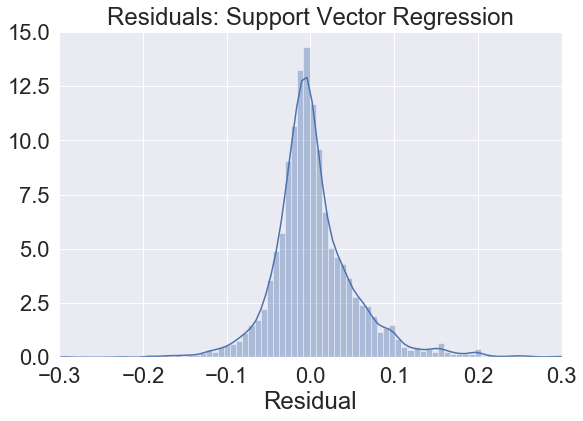

In [28]:
# Plot of residuals

sns.distplot((y_test-svr_prediction),bins=100, norm_hist = False);
plt.xlabel('Residual')
plt.xlim(-0.3, 0.3)
plt.title('Residuals: Support Vector Regression')

## Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
n_estimators = [int(x) for x in np.linspace(start = 280, stop = 500, num = 10)]
random_state = [0]

grid = {'max_depth': max_depth,
        'max_features': max_features,
        'n_estimators': n_estimators,
        'random_state': random_state}

rf = grid_search(rf, grid)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 353, 'random_state': 0}


In [30]:
#Random Forest Prediction
rf_prediction = scores(rf)

MSE: 0.003
R2 score: 0.595
MAE score: 0.035
MSE cross validation score: -0.003 (+/- 0.000)
R2 cross validation score: 0.589 (+/- 0.035)


Text(0.5, 1.0, 'Residuals: Random Forest')

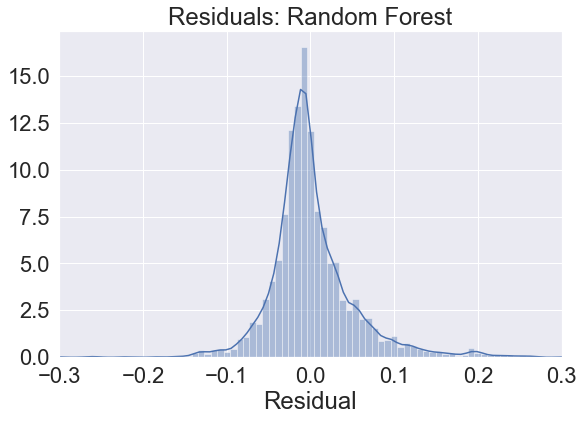

In [31]:
# Plot of residuals
sns.distplot((y_test-rf_prediction),bins=100, norm_hist = False);
plt.xlabel('Residual')
plt.xlim(-0.3, 0.3)
plt.title('Residuals: Random Forest')

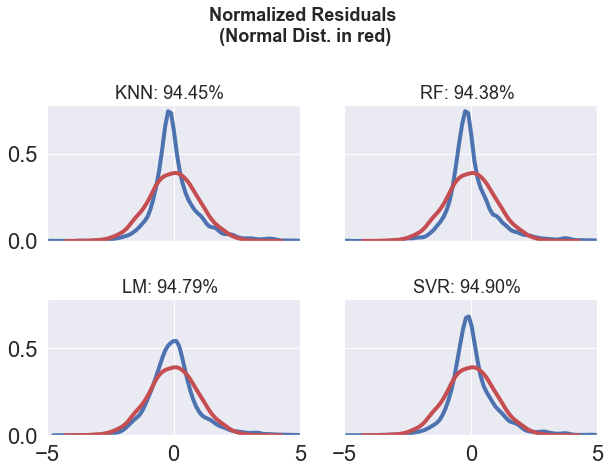

In [32]:
# plot standardized residuals

knn_resid = residuals(knn_prediction)
rf_resid = residuals(rf_prediction)
lm_resid = residuals(lm_prediction)
svr_resid = residuals(svr_prediction)

plt.close('all')
resid_fig, ax = plt.subplots(2, 2, sharex = True, sharey = True)

norm = np.random.standard_normal(10000)

ax1 = sns.kdeplot(knn_resid, ax=ax[0, 0], lw = 4, color = 'b')
ax1 = sns.kdeplot(norm, ax=ax[0, 0], lw = 4, color = 'r')
ax1.set_title("KNN: %s" % outliers(knn_resid), size = 18, x = .485, ha = 'center')

ax2 = sns.kdeplot(rf_resid, ax=ax[0, 1],lw = 4)
ax2 = sns.kdeplot(norm, ax=ax[0, 1], lw = 4, color = 'r')
ax2.set_title("RF: %s" % outliers(rf_resid), size = 18, x = .485, ha = 'center')

ax3 = sns.kdeplot(lm_resid, ax=ax[1, 0], lw = 4)
ax3 = sns.kdeplot(norm, ax=ax[1, 0], lw = 4, color = 'r')
ax3.set_title("LM: %s" % outliers(lm_resid), size = 18, x = .485, ha = 'center')

ax4 = sns.kdeplot(svr_resid, ax=ax[1, 1], lw = 4)
ax4 = sns.kdeplot(norm, ax=ax[1, 1], lw = 4, color = 'r')
ax4.set_title("SVR: %s" % outliers(svr_resid), size = 18, x = .485, ha = 'center')

plt.xlim(-5, 5)
resid_fig.suptitle("Normalized Residuals \n(Normal Dist. in red)", weight = 'bold', size = 18, y = 1.12)

plt.tight_layout()

In [33]:
#Save models
import joblib

joblib.dump(rf, 'rf_model_nba_contract.sav')
joblib.dump(lm, 'lm_model_nba_contract.sav')
joblib.dump(knn, 'knn_model_nba_contract.sav')
joblib.dump(svr, 'svr_model_nba_contract.sav')

['svr_model_nba_contract.sav']

## Deep Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Test train split
X = df[features].drop('percent_of_cap', axis = 1).values
y = df['percent_of_cap'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
# Only fit scaler to training data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
DNN = Sequential()

# Input Layer
DNN.add(Dense(18, activation= 'relu'))
DNN.add(Dropout(0.25))

#Hidden Layers
DNN.add(Dense(9, activation= 'relu'))
#DNN.add(Dropout(0.25))
#DNN.add(Dense(9, activation= 'relu'))
#DNN.add(Dropout(0.25))

# Output Layer
DNN.add(Dense(1))

#Compile
DNN.compile(loss = 'mse', optimizer = 'adam')

In [38]:
# Define early stop parameter
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min',
                           verbose = 1, patience = 25)

In [39]:
# Fit model
DNN.fit(x = X_train, 
          y = y_train, 
          epochs = 250, 
          validation_data = (X_test, y_test), 
          callbacks = [early_stop])

Train on 8115 samples, validate on 2705 samples
Epoch 1/250
8115/8115 [==============================] - 1s 119us/sample - loss: 0.0073 - val_loss: 0.0037
Epoch 2/250
8115/8115 [==============================] - 1s 64us/sample - loss: 0.0042 - val_loss: 0.0033
Epoch 3/250
8115/8115 [==============================] - 1s 62us/sample - loss: 0.0038 - val_loss: 0.0032
Epoch 4/250
8115/8115 [==============================] - 1s 63us/sample - loss: 0.0036 - val_loss: 0.0032
Epoch 5/250
8115/8115 [==============================] - 1s 62us/sample - loss: 0.0034 - val_loss: 0.0032
Epoch 6/250
8115/8115 [==============================] - 1s 63us/sample - loss: 0.0033 - val_loss: 0.0031
Epoch 7/250
8115/8115 [==============================] - 1s 63us/sample - loss: 0.0033 - val_loss: 0.0030
Epoch 8/250
8115/8115 [==============================] - 1s 65us/sample - loss: 0.0033 - val_loss: 0.0030
Epoch 9/250
8115/8115 [==============================] - 1s 62us/sample - loss: 0.0031 - val_loss: 0.00

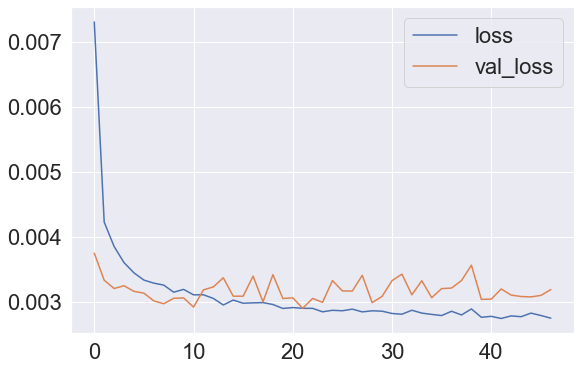

In [40]:
losses = pd.DataFrame(DNN.history.history)
losses.plot()

In [41]:
pred = DNN.predict(X_test)
print('MSE: %.3f' %mean_squared_error(y_test, pred))
print('R2 score: %.3f' %r2_score(y_test, pred))
print('MAE score: %.3f' %mean_absolute_error(y_test, pred))
    
    
#cv_score = cross_val_score(DNN, X_test, y_test, cv = 3, scoring= 'neg_mean_squared_error')
#print('MSE cross validation score: %0.3f (+/- %0.3f)' %(cv_score.mean(), cv_score.std()*2))
    
#cv_score = cross_val_score(DNN, X_test, y_test.values.ravel(), cv = 3, scoring = 'r2')
#print("R2 cross validation score: %0.3f (+/- %0.3f)" % (cv_score.mean(), cv_score.std() * 2))
    

MSE: 0.003
R2 score: 0.529
MAE score: 0.040


## Cross-Validation Scores

In [42]:
df2 = pd.DataFrame(np.array([['LM',  0.525,'+/- 0.045', -0.003,'+/- 0.001' ], 
                             ['KNN', 0.541,'+/- 0.040', -0.003,'+/- 0.001' ], 
                             ['RF',  0.576,'+/- 0.037', -0.003,'+/- 0.000' ],
                             ['SVR', 0.562,'+/- 0.038', -0.003,'+/- 0.001']]),
                   columns=['Model', 'R-squared', '95% CI', 'MSE', ' 95% CI'])
df2

,Model,R-squared,95% CI,MSE,95% CI
0,LM,0.525,+/- 0.045,-0.003,+/- 0.001
1,KNN,0.541,+/- 0.040,-0.003,+/- 0.001
2,RF,0.576,+/- 0.037,-0.003,+/- 0.000
3,SVR,0.562,+/- 0.038,-0.003,+/- 0.001


## Make Predictions on 2018-19 Data

In [43]:
#Read 2018-10 Database
df_2018 = pd.read_csv('2018-19 Data2.csv')

df_2018.head()

,player,debut,salary,season_start,season_end,years_pro,tm,year_cap,percent_of_cap,age,...,tov_perv,usg_perc,ows,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp
0,Stephen Curry,2009,37457154,2018,2019,10,GSW,99093000,0.378000,30,...,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,5.1
1,Chris Paul,2005,35654150,2018,2019,14,HOU,99093000,0.359805,33,...,15.8,22.5,4.4,2.2,6.6,0.172,2.9,0.2,3.0,2.4
2,Russell Westbrook,2008,35654150,2018,2019,11,OKC,99093000,0.359805,30,...,16.3,30.9,1.8,5.0,6.8,0.124,2.5,3.9,6.5,5.6
3,LeBron James,2003,35654150,2018,2019,16,LAL,99093000,0.359805,34,...,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9
4,Blake Griffin,2009,32088932,2018,2019,10,DET,99093000,0.323826,29,...,13.8,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4


In [44]:
# function to create predictions from each model

def make_pred(model_list, df_pred):
    prob_list = []
    
    for i in model_list:
        prob_list.append(i.predict(df_pred))
        
    return prob_list

In [45]:
new_season = df_2018[features].drop('percent_of_cap', axis = 1).values
dnn_predict = DNN.predict(scaler.transform(new_season))

In [46]:
# clean predictions 
prob_list = make_pred([lm, knn, rf, svr], df_2018[features].drop('percent_of_cap', axis =1))

pred_vals = pd.DataFrame(data = np.transpose(prob_list), columns = ['lm', 'knn', 'rf', 'svr']) 

pred_vals['avg'] = (pred_vals['lm'] + pred_vals['knn'] + pred_vals['rf'] + pred_vals['svr']) / 4
pred_vals['dnn'] = pd.DataFrame(dnn_predict.reshape((459,)))

In [47]:
df_salary_pred = df_2018.join(pred_vals)
df_salary_pred['diff'] = df_salary_pred['avg'] - df_salary_pred['percent_of_cap']


## Evaluate Prediction

([], <a list of 0 Text yticklabel objects>)

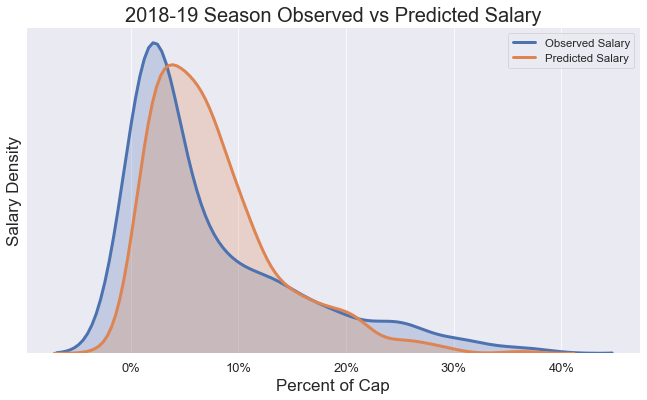

In [203]:
plt.figure(figsize=(11,6))
ob_pred_den = sns.kdeplot(df_salary_pred['percent_of_cap'], shade = True, lw = 3)
ob_pred_den =sns.kdeplot(df_salary_pred['avg'], shade = True, lw = 3)

plt.legend(['Observed Salary', 'Predicted Salary'])
plt.xlabel('Percent of Cap', fontsize = 17)
plt.ylabel('Salary Density', fontsize = 17)
plt.title('2018-19 Season Observed vs Predicted Salary', fontsize = 20)
plt.xticks(fontsize = 13)
tic_vals = ob_pred_den.get_xticks()
ob_pred_den.set_xticklabels(['{:,.0%}'.format(x) for x in tic_vals], fontsize = 13)
plt.yticks([],[])


In [152]:
# function to make bar graph from predictions

def make_plot(df_rows, color, title, neg_bool, height, file_name):
    
    fig,ax = plt.subplots(figsize=(12,7))
    
    y = df_rows['diff']
    labels = df_rows['player']
    x = range(len(y))
    
    ax.bar(x, y, width = .7,  color = color, linewidth = 4, label = 'Predicted')
    
    rects = ax.patches
    
    if neg_bool == True:
        for rect, label in zip(rects, labels):
            ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black',  fontsize = 20)
    else:
        for rect, label in zip(rects, labels):
            ax.text(rect.get_x() + rect.get_width() / 2.5, -height, label,
            ha='center', va='top', rotation = -90, color = 'black', fontsize = 20)

    fig.suptitle("%s" % title, weight = 'bold', size = 20)
    ax.xaxis.set_visible(False)
    tic_vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in tic_vals], fontsize = 13)
    ax.set_ylabel("Predicted - Observed % of Cap", fontsize = 16)


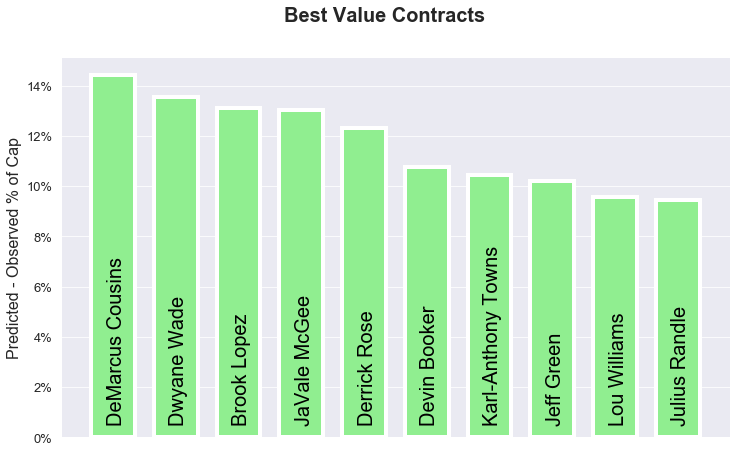

In [153]:
#Best Value Contracts

best_val = df_salary_pred.sort_values(by = 'diff', ascending = False).reset_index(drop = True).iloc[0:10]

make_plot(best_val, 'lightgreen', "Best Value Contracts", True, 0.005, 'best-val')

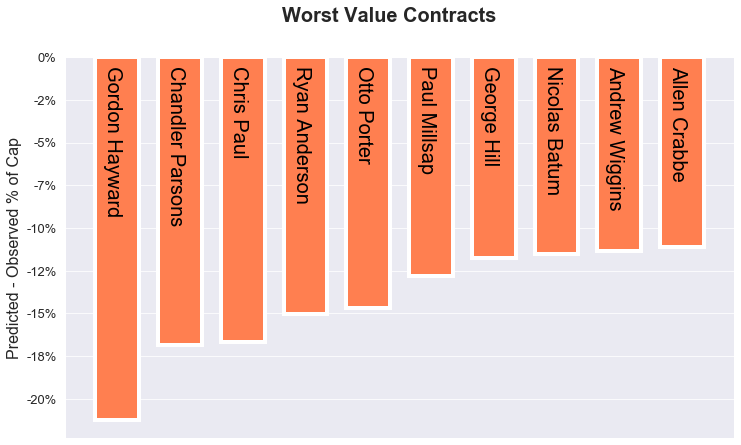

In [154]:
#Worst Value contracts

worst_val = df_salary_pred[df_salary_pred['player'] != 'Stephen Curry'].sort_values(by = 'diff', ascending = True).reset_index(drop = True).iloc[0:10]

make_plot(worst_val, 'coral', "Worst Value Contracts", False, 0.005, 'worst-val')

In [162]:
luka_sal=[]
for i in range (1,15):
    luka_pre = (rf.predict([[ i  , 21.2  ,  7.8  ,  6.   ,  1.1  ,  0.3  ,  4.9  ,  0.545, 32.2  ,  4.1 ]]) 
        + knn.predict([[ i  , 21.2  ,  7.8  ,  6.   ,  1.1  ,  0.3  ,  4.9  ,  0.545, 32.2  ,  4.1 ]])
        + svr.predict([[ i  , 21.2  ,  7.8  ,  6.   ,  1.1  ,  0.3  ,  4.9  ,  0.545, 32.2  ,  4.1 ]])
        + lm.predict([[ i  , 21.2  ,  7.8  ,  6.   ,  1.1  ,  0.3  ,  4.9  ,  0.545, 32.2  ,  4.1 ]]))/4
    
    
    luka_sal.append(luka_pre)
    
luka_sal

[array([0.13234051]),
 array([0.14334658]),
 array([0.15193011]),
 array([0.16404996]),
 array([0.18475669]),
 array([0.19660013]),
 array([0.20572994]),
 array([0.21307734]),
 array([0.22208402]),
 array([0.23074468]),
 array([0.24192045]),
 array([0.24989877]),
 array([0.26536964]),
 array([0.27238105])]

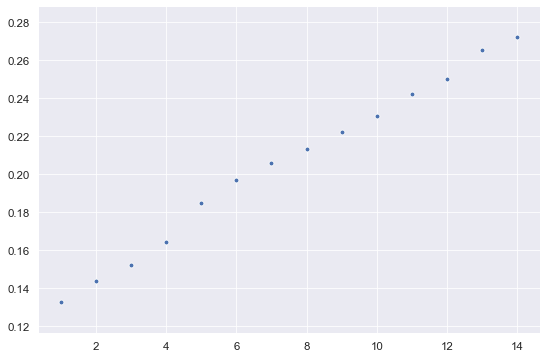

In [164]:
sns.scatterplot(x = [i for i in range(1,15)], y = luka_sal)

In [66]:
rf.predict([[ 4.   , 21.2  ,  7.8  ,  6.   ,  1.1  ,  0.3  ,  4.9  ,  0.545,
        32.2  ,  4.1 ]])

array([0.15611278])